In [ ]:
import sys
from pathlib import Path

def in_colab():
    try:
        import google.colab  # noqa: F401
        return True
    except Exception:
        return False

if in_colab():
    from google.colab import drive
    drive.mount("/content/drive")
    REPO_PATH = Path("/content/drive/My_Drive/einstein_program_synthesis/scripts")  # adjust if needed
else:
    REPO_PATH = Path.home() / "Documents" / "Code" / "einstein_program_synthesis" / "scripts"  # adjust if needed

sys.path.insert(0, str(REPO_PATH.resolve()))
print("using repo path:", REPO_PATH.resolve())
print("exists?", REPO_PATH.exists())
print("contains:", [p.name for p in REPO_PATH.glob("*.py")])


using repo path: /home/omar/Documents/Code/einstein_program_synthesis/scripts
exists? True
contains: ['synthesis_primitives.py', 'einstein_types.py', 'context.py', 'judgments.py', 'typing_rules.py', 'simplify.py', 'bayes_neural_search.py', 'pure_bayes_search.py', 'synthesis_state.py']


# Bayes neural search

In [2]:
import importlib
import bayes_neural_search as bn
from einstein_types import Art, Emp

bn = importlib.reload(bn)
print("module path:", bn.__file__)

module path: /home/omar/Documents/Code/einstein_program_synthesis/scripts/bayes_neural_search.py


In [3]:
import sys, torch, numpy as np
print(sys.version)
print("torch:", torch.__version__, " numpy:", np.__version__)

3.10.16 (main, Dec 11 2024, 16:24:50) [GCC 11.2.0]
torch: 2.5.1  numpy: 2.0.1


## Search settings

In [4]:
bn.MAX_SAMPLES_BAYES = 1000
bn.BATCH_SIZE        = 64
bn.EPOCHS            = 3
bn.LR                = 1e-3

bn.MAX_SAMPLES       = 1000
bn.CHAIN_LENGTH      = 8
bn.FEATURE_DIM       = 128

bn.TERM_WEIGHT       = 0.7
bn.TYPE_WEIGHT       = 0.3
bn.GOAL_TERM         = "t - u*x/c**2"
bn.GOAL_TYPE         = Art & Emp
bn.TARGET_TERM       = "f(-k*y + t*w - k*u*x/c)"

bn.MIX_BASE          = 0.1

bn.BACKWARD_NAMES               = {"BWD"}
bn.ENABLE_NO_REPEAT             = False
bn.ENABLE_SUB1_CONSTRAINT       = False
bn.ENABLE_SIM_SIMPUS_CONSTRAINT = False
bn.ENABLE_SIMPUS_SIM_CONSTRAINT = False
bn.ENABLE_BACKWARD_GATE         = False
bn.ENABLE_BACKWARD_ONLY_MODE    = False

bn.VERBOSE = True

# How many independent runs for this quickstart
N_RUNS = 150  # keep small for a quick demo

## Neural network

In [ ]:
net = bn.train_policy()

/content/drive/My Drive/einstein_program_synthesis/scripts/bayes_neural_search.py:194: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(S), torch.tensor(A)


Epoch  0  policy_loss=1.8583
Epoch  1  policy_loss=1.8094
Epoch  2  policy_loss=1.7707


## Search

In [ ]:
results = bn.run_experiments(net, n_runs=N_RUNS, max_samples=bn.MAX_SAMPLES, parallel=False)
# results[:10]  # peek first few
# results

Run  1: ✅ reached at program 479
Run  2: ✅ reached at program 457
Run  3: ✅ reached at program 400
Run  4: ✅ reached at program 523
Run  5: ✅ reached at program 366
Run  6: ✅ reached at program 510
Run  7: ✅ reached at program 534
Run  8: ✅ reached at program 526
Run  9: ✅ reached at program 504
Run 10: ✅ reached at program 474
Run 11: ✅ reached at program 399
Run 12: ✅ reached at program 65
Run 13: ✅ reached at program 262
Run 14: ✅ reached at program 539
Run 15: ✅ reached at program 542
Run 16: ✅ reached at program 409
Run 17: ✅ reached at program 382
Run 18: ✅ reached at program 412
Run 19: ✅ reached at program 448
Run 20: ✅ reached at program 555
Run 21: ✅ reached at program 546
Run 22: ✅ reached at program 544
Run 23: ✅ reached at program 503
Run 24: ✅ reached at program 514
Run 25: ✅ reached at program 544
Run 26: ✅ reached at program 448
Run 27: ✅ reached at program 400
Run 28: ✅ reached at program 533
Run 29: ✅ reached at program 209
Run 30: ✅ reached at program 461
Run 31: ✅ r

## Success indices at which goal is met

In [ ]:
# Successful runs return an integer index; failures are None
success_indices = [r for r in results if r is not None]

print("All program-indices at which the goal was met:")
print(success_indices)


All program-indices at which the goal was met:
[479, 457, 400, 523, 366, 510, 534, 526, 504, 474, 399, 65, 262, 539, 542, 409, 382, 412, 448, 555, 546, 544, 503, 514, 544, 448, 400, 533, 209, 461, 543, 559, 425, 533, 548, 479, 83, 522, 238, 485, 483, 462, 281, 425, 374, 542, 281, 403, 188, 503, 544, 474, 541, 492, 549, 556, 185, 469, 210, 523, 344, 507, 549, 267, 469, 508, 119, 332, 508, 467, 492, 452, 272, 527, 311, 551, 458, 365, 538, 542, 419, 543, 529, 548, 111, 418, 455, 469, 291, 440, 142, 534, 440, 498, 490, 241, 552, 537, 391, 530, 510, 374, 469, 473, 403, 542, 372, 541, 532, 430, 104, 356, 543, 509, 532, 514, 428, 438, 469, 556, 539, 527, 135, 531, 529, 530, 174, 551, 447, 334, 245, 161, 154, 440, 274, 317, 14, 527, 512, 493, 491, 550, 540, 486, 502, 402, 541, 523, 469, 478]


## Save success indices

In [ ]:
import os, numpy as np

# Change this to wherever you want files saved
output_dir = '/content/drive/My Drive/einstein_program_synthesis/images'
os.makedirs(output_dir, exist_ok=True)

out_path = os.path.join(output_dir, 'success_indices_bayes_neural.csv')
np.savetxt(
    out_path,
    success_indices,
    fmt='%d',
    header='success_index',
    delimiter=',',
    comments=''
)
print(f"\n✅ Saved {len(success_indices)} indices to\n{out_path}")



✅ Saved 150 indices to
/content/drive/My Drive/einstein_program_synthesis/images/success_indices.csv


## Calculate statistics

In [ ]:
import numpy as np

def summarize(results):
    # keep numeric, non-None, non-NaN entries
    arr = np.array([x for x in results if x is not None and not (isinstance(x, float) and np.isnan(x))], dtype=float)
    n = arr.size
    if n == 0:
        return {
            "n": 0,
            "mean": None, "std": None, "cv": None,
            "median": None, "iqr": None,
            "q25": None, "q75": None,
            "p50": None, "p90": None, "p95": None,
            "min": None, "max": None,
        }

    mean = float(arr.mean())
    std  = float(arr.std(ddof=1)) if n > 1 else 0.0  # sample std if possible
    q25  = float(np.quantile(arr, 0.25))
    med  = float(np.quantile(arr, 0.50))
    q75  = float(np.quantile(arr, 0.75))
    iqr  = float(q75 - q25)

    stats = {
        "n": n,
        "mean": mean,
        "std": std,
        "cv": (float(std/mean) if mean != 0 else None),
        "median": med,
        "iqr": iqr,
        "q25": q25,
        "q75": q75,
        "p50": med,
        "p90": float(np.percentile(arr, 90)),
        "p95": float(np.percentile(arr, 95)),
        "min": float(arr.min()),
        "max": float(arr.max()),
    }
    return stats

stats = summarize(results)
print(stats)


{'n': 150, 'mean': 433.7, 'std': 127.76896883035863, 'cv': 0.29460218775734065, 'median': 476.0, 'iqr': 137.75, 'q25': 393.0, 'q75': 530.75, 'p50': 476.0, 'p90': 544.0, 'p95': 549.55, 'min': 14.0, 'max': 559.0}


## Save statistics

In [ ]:
import os, csv

output_dir = '/content/drive/My Drive/einstein_program_synthesis/images'
csv_path = os.path.join(output_dir, 'bayes_neural_stats.csv')
with open(csv_path, 'w', newline='') as fp:
    writer = csv.writer(fp)
    # stable ordering for columns
    cols = ["n","mean","std","cv","median","iqr","q25","q75","p50","p90","p95","min","max"]
    writer.writerow(cols)
    writer.writerow([stats[c] for c in cols])

print(f"✅ Saved Bayes-Neural stats to {csv_path}")


✅ Saved Bayes-Neural stats to /content/drive/My Drive/einstein_program_synthesis/images/bayes_neural_stats.csv


## Plot success rate versus program index

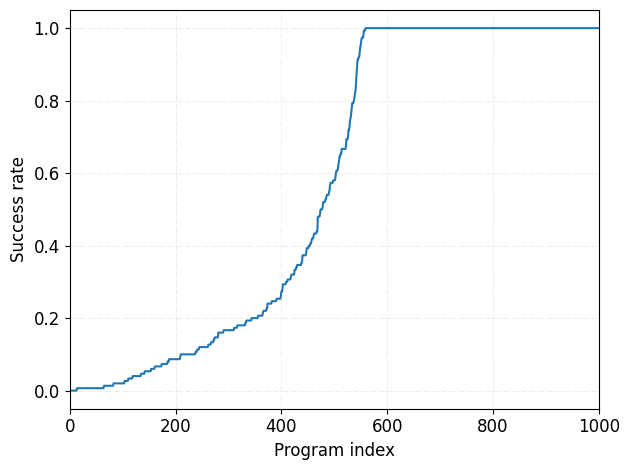

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given success indices from this batch
success_array = np.array(success_indices, dtype=int)
num_runs = len(success_indices)
max_program = bn.MAX_SAMPLES  # x-axis limit (your sampling budget)

# X axis: program indices 1..max_program
x = np.arange(1, max_program + 1)

# Cumulative success rate at each program index k
# (fraction of runs that succeeded at or before k)
success_rate = np.array([(success_array <= k).sum() for k in x]) / max(num_runs, 1)

# Plot
plt.figure()
plt.plot(x, success_rate)
plt.xlabel("Program index", fontsize=12)
plt.ylabel("Success rate", fontsize=12)
# plt.title("Success Rate over Program Index")

# Bigger tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Force x-axis from 0 to max_program
plt.xlim(0, max_program)

# Grid a bit darker/heavier (like your screenshot)
plt.grid(
    True,
    color="#CCCCCC",   # darker gray
    linewidth=0.6,     # slightly thicker
    linestyle='-.',    # dashed-dot
    alpha=0.4          # more opaque
)

# Optional: remove top & right spines
# ax = plt.gca()
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


## Reset caches

In [ ]:
bn.expr_to_str.cache_clear()
bn.closeness.cache_clear()
bn._apply_primitive_cached.cache_clear()
bn._ctx_cache.clear(); bn._cursor_cache.clear()
